# Red neuronal con keras, experimentación para clasificar 
Programa para ir probando un perceptrón multicapa y así ver cómo se comporta al clasificar los datos, en cuanto a su exactitud en las predicciones. 

0 -> wprime

1 -> qcd2

2020

Universidad de Sonora

Hugo Valenzuela

In [22]:
# librerias necesarias para correr el script
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import tensorflow as tf

# Importación del conjunto de datos

In [23]:
# leer conjunto de datos como dataframe
df_raw = pd.read_csv("datos_total_0-1.csv")
df_raw.head(10)

,Event.Num,Jet.PT,Jet.Eta,Jet.Phi,Jet.Mass,label
0,0,435.87405,1.169259,2.149699,95.342636,0.0
1,1,356.08795,1.112353,2.928590,92.816642,0.0
2,2,306.84622,1.541800,-2.118808,83.307869,0.0
3,4,354.53042,2.338400,-0.864499,107.290620,0.0
4,5,399.03759,1.088779,-1.401475,111.323660,0.0
5,6,346.35165,-0.229487,0.978089,82.723854,0.0
6,7,299.17434,2.241789,-1.181541,68.972709,0.0
7,10,343.10894,-0.796330,-1.264972,93.744010,0.0
8,11,326.23043,0.035775,-2.885322,105.118690,0.0
9,12,275.87857,-1.111962,-1.678103,96.796554,0.0


In [24]:
# los datos vienen preprocesados de otro programa de python, por lo que no se ocupara modificarlos demasiado
# corroboramos que no hayan quedado datos faltantes
df_raw.isnull().sum()

Event.Num    0
Jet.PT       0
Jet.Eta      0
Jet.Phi      0
Jet.Mass     0
label        0
dtype: int64

In [25]:
# tipo de variable en las columnas
df_raw.dtypes

Event.Num      int64
Jet.PT       float64
Jet.Eta      float64
Jet.Phi      float64
Jet.Mass     float64
label        float64
dtype: object

In [26]:
x = df_raw["Jet.Mass"]
df_raw.shape

(1776, 6)

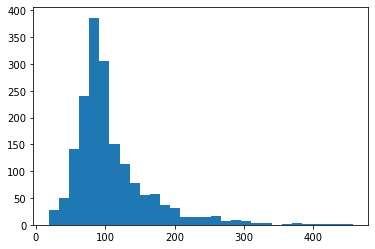

In [27]:
# histograma de las variables para ir checando los valores
import matplotlib.pyplot as plt
plt.hist(x, bins = 30)
plt.show()


In [28]:
# Particionar el conjunto de datos en training y test
# Ademas se mezcla aleatoriamente el conjunto de datos, para evitar sesgos
df_train, df_test = train_test_split( df_raw, test_size = 0.20, random_state = 8463541 )
df_train = df_train.copy()
df_test = df_test.copy()

In [29]:
# Separamos la variable dependiente de las variables independientes
# Es decir, separamos las características de las etiquetas
X_train = df_train.drop(["label", "Event.Num"], axis = 1)
X_test = df_test.drop(["label", "Event.Num"], axis = 1)
y_train = df_train["label"]
y_test = df_test["label"]

In [30]:
y_train.head(20)

1427    1.0
934     1.0
295     0.0
680     0.0
648     0.0
1373    1.0
748     0.0
628     0.0
1404    1.0
897     1.0
1438    1.0
811     1.0
867     1.0
1471    1.0
887     1.0
712     0.0
1200    1.0
1710    1.0
485     0.0
1764    1.0
Name: label, dtype: float64

In [31]:
# normalizacion de los datos de entrenamiento
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform( X_train ) 
X_train.loc[:,:] = scaled_values

In [32]:
# normalizacion de los datos de prueba
scaled_values = scaler.transform( X_test ) #DO NOT USE fit METHOD BECAUSE IT'S BEEN MODIFIED ACCORDING TO X_train
X_test.loc[:,:] = scaled_values

In [33]:
X_train.head()

,Jet.PT,Jet.Eta,Jet.Phi,Jet.Mass
1427,0.165373,0.708595,0.943713,0.147783
934,0.270798,0.546211,0.322495,0.106874
295,0.037734,0.529398,0.126197,0.154533
680,0.009244,0.307576,0.255026,0.081559
648,0.156905,0.288615,0.449779,0.362647


In [34]:
# hot encoding datos test
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [35]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [36]:
# hot encoding datos test
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test)

In [37]:
y_test

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [38]:
# ver la dimension de las caracteristicas, que entraran al MLP
X_train = X_train.to_numpy()
X_train.shape

(1420, 4)

In [39]:
# KERAS
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

# Semilla para que los resultados sean reproducibles
from numpy.random import seed
seed(486451)

# Definicion del modelo de red neuronal prealimentada

model = Sequential()
model.add(Dense(8,input_dim=4, activation='relu')) 

model.add(Dense(2, activation='sigmoid'))

# Optimizador de descenso por gradiente
sgd = optimizers.SGD(lr = 0.01, nesterov=False)

# Compilar el modelo de keras con funcion de costo entropia cruzada
model.compile(loss='binary_crossentropy', optimizer = sgd, metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Se ajusta el modelo de keras al conjunto de datos de entrenamiento
# Ademas se hace un split del conjunto de entrenamiento con 0.25 para datos
# de validacion, con esto se tiene entrenamiento-validacion-prueba de 60%/20%/20%
model.fit(X_train, y_train, epochs = 100, validation_split = 0.25, batch_size = 10) # 100 epocas de iteracion

# Evaluar el modelo de keras respecto a la exactitud
_, accuracy = model.evaluate(X_test, y_test)
print('Exactitud: %.2f' % (accuracy*100))

Train on 1065 samples, validate on 355 samples
Epoch 1/100
1065/1065 [==============================] - 0s 378us/step - loss: 0.7003 - accuracy: 0.4953 - val_loss: 0.6929 - val_accuracy: 0.5183
Epoch 2/100
1065/1065 [==============================] - 0s 244us/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6894 - val_accuracy: 0.5310
Epoch 3/100
1065/1065 [==============================] - 0s 315us/step - loss: 0.6884 - accuracy: 0.5216 - val_loss: 0.6874 - val_accuracy: 0.5380
Epoch 4/100
1065/1065 [==============================] - 0s 199us/step - loss: 0.6854 - accuracy: 0.5521 - val_loss: 0.6863 - val_accuracy: 0.5423
Epoch 5/100
1065/1065 [==============================] - 0s 170us/step - loss: 0.6835 - accuracy: 0.5634 - val_loss: 0.6855 - val_accuracy: 0.5577
Epoch 6/100
1065/1065 [==============================] - 0s 161us/step - loss: 0.6820 - accuracy: 0.5718 - val_loss: 0.6850 - val_accuracy: 0.5394
Epoch 7/100
1065/1065 [==============================] - 0s 185us/step 

1065/1065 [==============================] - 0s 284us/step - loss: 0.5829 - accuracy: 0.7803 - val_loss: 0.5799 - val_accuracy: 0.7915
Epoch 57/100
1065/1065 [==============================] - 0s 156us/step - loss: 0.5781 - accuracy: 0.7962 - val_loss: 0.5747 - val_accuracy: 0.8169
Epoch 58/100
1065/1065 [==============================] - 0s 168us/step - loss: 0.5733 - accuracy: 0.8244 - val_loss: 0.5698 - val_accuracy: 0.8239
Epoch 59/100
1065/1065 [==============================] - 0s 213us/step - loss: 0.5683 - accuracy: 0.8249 - val_loss: 0.5645 - val_accuracy: 0.8282
Epoch 60/100
1065/1065 [==============================] - 2s 1ms/step - loss: 0.5632 - accuracy: 0.8282 - val_loss: 0.5586 - val_accuracy: 0.8535
Epoch 61/100
1065/1065 [==============================] - 1s 1ms/step - loss: 0.5580 - accuracy: 0.8577 - val_loss: 0.5533 - val_accuracy: 0.8563
Epoch 62/100
1065/1065 [==============================] - 0s 356us/step - loss: 0.5527 - accuracy: 0.8531 - val_loss: 0.5475 - va

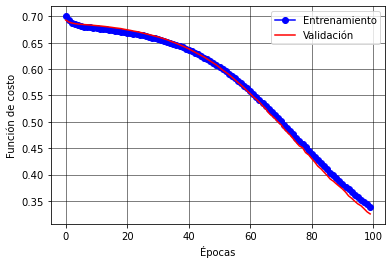

In [40]:
# Vemos como evoluciona el error
import matplotlib.pyplot as plt
plt.plot(model.history.epoch, model.history.history['loss'], "b-o")
plt.plot(model.history.epoch, model.history.history['val_loss'], "r")
plt.legend(["Entrenamiento", "Validación"])
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Épocas')
plt.ylabel('Función de costo')
plt.show()
#plt.savefig("loss_plot_capa-oculta-8", dpi = 300)

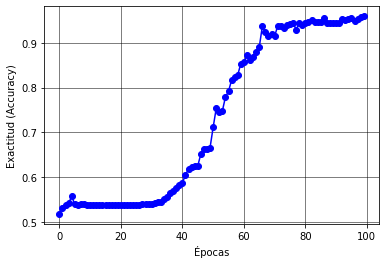

In [41]:
# Grafica de los valores de la función accuracy
plt.plot(model.history.epoch, model.history.history['val_accuracy'], "b-o")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Épocas')
plt.ylabel('Exactitud (Accuracy)')
plt.show()
#plt.savefig("accuracy_plot_capa-oculta-8", dpi = 300)

In [42]:
# Resumen del modelo de keras
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 18        
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________
None
